# Moral Hazard models

Consumer owns a risky asset (e.g. an apple tree) that delivers $(x_1, x_0)$ in state of the world 1 and 0, with probabilities $p$ and $(1-p)$ respectively.

Risk averse consumer wants to exchange state contingent claims to achieve a preferred consumption bundle $(c_1, c_0)$ to max von-Neumann Morgenstern expected utility: 

$$\max_{c_0,c_1}   EU(c|p)$$

subject to financial firm's zero profit condition:

$$E(c|p) \leq E(x|p)$$

where $EU(c|p) = p u(c_1) + (1-p) u(c_0)$ and $E(x|p) =p c_1 + (1-p)c_0$ 

FOC:

$$ \frac{1}{u'(c_i)} = \lambda \text{   } \forall i$$



Can extend to many states of the world:

$$E(x|e) = \sum_i {x_i \cdot f(x_i|e)}$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [2]:
alpha = 0.25

In [3]:
def u(c, alpha=alpha):
    return (1/alpha)*c**alpha

def E(x,p):
    return p*x[1] + (1-p)*x[0]

def EU(c, p):
    return p*u(c[1]) + (1-p)*u(c[0])

def budgetc(c0, p, x):
    return E(x,p)/p - ((1-p)/p)*c0

def indif(c0, p, ubar):
    return (alpha*(ubar-(1-p)*u(c0))/p)**(1/alpha)

def IC(c0,p,q,B):
    '''incentive compatibility line'''
    return (alpha*(u(c0)+B/(p-q)))**(1/alpha)

## The consumer's optimum

$$L(c_1,c_2) = U(c_1,c_2) + \lambda (I - p_1 c_1  - p_2 c_2) $$




Differentiate with respect to $c_1$ and $c_2$ and $\lambda$ to get:

$$ U_1 = \lambda{p_1}$$

$$ U_2 = \lambda{p_2}$$

$$ I = p_1 c_1  + p_2 c_2$$

Dividing the first equation by the second we get the familiar necessary tangency condition for an interior optimum:

$$MRS = \frac{U_1}{U_2} =\frac{p_1}{p_2}$$

Using our earlier expression for the MRS of a Cobb-Douglas indifference curve, substituting this into the budget constraint and rearranging then allows us to solve for the Marshallian demands:

$$c_1(p_1,p_2,I)=\alpha \frac{I}{p_1}$$

$$c_1(p_1,p_2,I)=(1-\alpha) \frac{I}{p_2}$$

In [4]:
def Bopt(p,x):
    '''Bank profit maximum'''
    return (alpha*EU(x,p))**(1/alpha)

def Copt(p,x):
    '''Consumer utility maximum'''
    return E(x,p)
    
    

In [5]:
x = [15,90]
p = 0.6

In [7]:
EU([36,36],p)

9.797958971132712

# Moral Hazard
##  Incentive Compatibility Constraint

Now two effort levels: Low $e_L$ (probability of success q) or High $e_H$ (probability of success p).
Agent's private benefit from avoiding diligence or effort is B.  

Effort is non-contractible and B cannot be observed/seized. Incentive compatibility constraint:

$$EU(c|p) \geq EU(c|q) + B$$

In 2 outcome case can be re-arranged to:

$$u(c_1) \geq u(c_0) + \frac{B}{p-q}$$





## Interactive indifference curve diagram

In [8]:
p = 0.5
q = 0.4
cmax = 100
B = 1

In [9]:
IC(2,p,q,B)

185.23888158173554

In [14]:
def consume_plot(p,q,B,ic=False):
    c0 = np.linspace(0.1,200,num=100)
    
    #bank optimum
    c0e = Bopt(p,x)
    c1e = c0e
    uebar = EU([c0e,c1e],p)
    idfc = indif(c0, p, uebar)
    budg = budgetc(c0, p, [c0e,c1e])
    
    #consumer optimum
    c0ee = Copt(p,x)
    c1ee = c0ee
    uemax = EU([c0ee,c1ee],p)
    idfcmax = indif(c0, p, uemax)
    zerop = budgetc(c0, p, x)
    icline = IC(c0,p,q,B)
       
    
    fig, ax = plt.subplots(figsize=(5,5))
    if ic:
        ax.plot(c0,icline)
    ax.plot(c0, budg, lw=2.5)
    ax.plot(c0, zerop, lw=2.5)
    ax.plot(c0, idfc, lw=2.5)
    ax.plot(c0, idfcmax, lw=2.5)
    ax.plot(c0,c0)
    #ax.vlines(c0e,0,c2e, linestyles="dashed")
    #ax.hlines(c1e,0,c1e, linestyles="dashed")
    ax.plot(c0e,c1e,'ob')
    ax.plot(c0ee,c1ee,'ob')
    ax.plot(x[0],x[1],'ob')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel(r'$c_0$', fontsize=16)
    ax.set_ylabel('$c_1$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

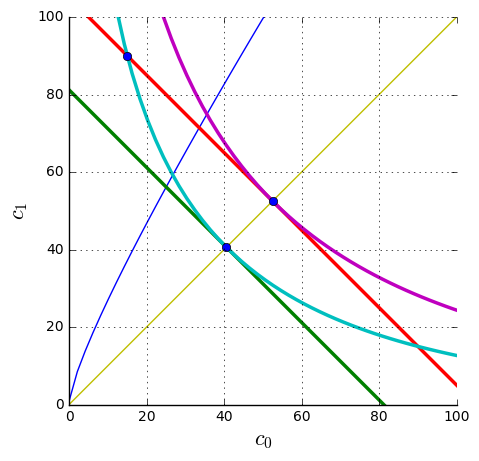

In [15]:
interact(consume_plot,p=fixed(0.5),q=(0.1,0.5,0.01),B=(0,3,0.1))

If we set this up and solve it as a Lagrangean (loosely following Holmstrom, 1979) we get a condition like this:

$$\frac{1}{u'(c_i)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x_i,e_L)}{f(x_i,e_H)}} \right ]  \text{ }\forall i
$$

In our two outcome case $p=f(x_1|e_H)$ and $q=f(x_1|e_L)$ and this becomes:

$$\frac{1}{u'(c_1)} = \lambda + \mu \cdot 
\left [ {1-\frac{q}{p}} \right ]  
$$

$$\frac{1}{u'(c_0)} = \lambda + \mu \cdot 
\left [ {1-\frac{1-q}{1-p}} \right ]  
$$

TODO:  
 - Functions to solve the two outcome cases (closed form possible, substitute IC into binding PC; or 2 FOC plus IC plus PC for $c_0, c_1, \lambda  \text{ and } \mu$).
 - Function to solve numerically for N outcomes (N FOCs and one participation constraint).
 - discuss how sensitive to distribution

Holmstrom's sufficient statistic

$$\frac{1}{u'(c)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x,y,e_L)}{f(x,y,e_H)}} \right ]  \text{ }\forall i
$$